# Omphemetse Mangope 
Advanced Machine Learning    
Practical Assignment 5: L2 regularized polynomial regression   
Extended due date: 19 June 2020   

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import scale

import warnings 
warnings.filterwarnings("ignore") # Ignoring filter warnings 

# Design Matrix and L2 regularizer functions

In [282]:
def designMatrix(x):
    n = len(x) # 
    X = np.c_[np.ones(n),x,x**2,x**3,x**4,x**5,x**6] 
    return(X)
# Design matrix of 6th degree polynomial for x input values 

def L2_regularizer(x,y,λ):
    I = np.eye(7)
    I[0,0] = 0
    theta = np.linalg.inv(x.T.dot(x) + λ*I).dot(x.T).dot(y)
    return(theta)
# L2 regularizer function that takes design matrix(x_values), lambda and y values. The function returns theta values 

# Data

In [283]:
n = 200 # number of observations
random.seed(123)
x = np.random.uniform(0,300,n) # x values generated from a random uniform distribution with n observations 
x = x[np.argsort(x)] # sorting x values into order 
y = 5 + x**1 + x**2 + x**3 # Real y values 

random.seed(123)
y_obs = y + np.random.normal(0,900000, n) # y values with noise having a very big variance 

# Splitting data into train and test variables 
x_train = x[x < 200] 
x_test = x[x >= 200]

y_train = y_obs[x < 200]
y_test = y_obs[x >= 200]


# Number of observations for train and test
n_train = len(x_train)
n_test = len(x_test)

# Substituting x_train and x_test into the design Matrix to get the polynomial degree=6

In [284]:
X_train = designMatrix(x_train) # x_train values fitted to design matrix 
X_test = designMatrix(x_test) # x_train values fitted to design matrix 

# Compute MSE for train data  

In [285]:
MSE_train = [] # Empty list for saving train MSE values computed

for λ in [0, 0.5, 10, 20, 30, 80, 100, 200]: # A loop for iterating through all lambda values 
    
    θ = L2_regularizer(X_train, y_train, λ) # Fitting the y_train, x_train and lambda into L2 Regularizer function
    y_pred = θ[0]*X_train[:,0] + θ[1]*X_train[:,1] + θ[2]*X_train[:,2] + θ[3]*X_train[:,3] + θ[4]*X_train[:,4] + \
             θ[5]*X_train[:,5] + θ[6]*X_train[:,6] # Predictions 
    # Please note that each values of θ and X_train is referenced 
    
    
    mse = 1/(2*n)*np.sum(y_train - y_pred)**2 # MSE values for Train data
    MSE_train.append(mse) # storing the mse values into the empty list MSE_train listed in first line

# Compute MSE for test data

In [286]:
MSE_test = [] 

for λ in [0, 0.5, 10, 20, 30, 80, 100, 200]:
    
    θ = L2_regularizer(X_train, y_train, λ)
    y_pred = θ[0]*X_test[:,0] + θ[1]*X_test[:,1] + θ[2]*X_test[:,2] + θ[3]*X_test[:,3] + θ[4]*X_test[:,4] + \
             θ[5]*X_test[:,5] + θ[6]*X_test[:,6] 
    mse = 1/(2*n)*np.sum(y_test - y_pred)**2
    MSE_test.append(mse)
    
# NB: The explaination for MSEs of test are the same as the ones on MSEs of train, therefore they will not be repeated here
# NB: θ is the same for both test and train of MSE because those are the theta values trained for the model.

# Scaling MSEs and Lambdas

In [287]:
MSE_train = scale(MSE_train) 
MSE_test = scale(MSE_test)
Lambdas = scale([0, 0.5, 10, 20, 30, 80, 100, 200]) # Scaled Lambdas
λ = [0, 0.5, 10, 20, 30, 80, 100, 200] # Unscaled Lambdas

# Table for Lambdas and MSEs

In [310]:
data = {'λ': λ,
        'MSE_train':MSE_train,
        'MSE_test':MSE_test} # Creating a dictionary for MSEs and Lambda values 

df = pd.DataFrame(data) # Transform dictionary to pandas dataframe to create a table 

df['Max'] = df[['MSE_train','MSE_test']].max(axis=1)
# In this case we compare the MSEs of train and the MSEs of test and get the maixumum value between them

def highlight_min(minimum): # Function for highlighting the best value of lambda
    
    is_min = minimum == minimum.min()
    return(['background-color:yellow' if v else '' for v in is_min])

df.style.apply(highlight_min, subset='Max') # Specifying the the column where the best value of lambda should be highlighted


,λ,MSE_train,MSE_test,Max
0,0,-0.583503,1.12282,1.12282
1,0.5,1.21713,1.10273,1.21713
2,10,2.07994,0.750507,2.07994
3,20,-0.280852,0.432115,0.432115
4,30,-1.05378,0.157494,0.157494
5,80,-0.34101,-0.782327,-0.34101
6,100,-0.456846,-1.02905,-0.456846
7,200,-0.581079,-1.75428,-0.581079


By observing the results for train MSEs and test MSEs with regards to different lambdas, we can select the best value for λ by cross validation. The best value of λ using the min-max cross-validation is λ=200

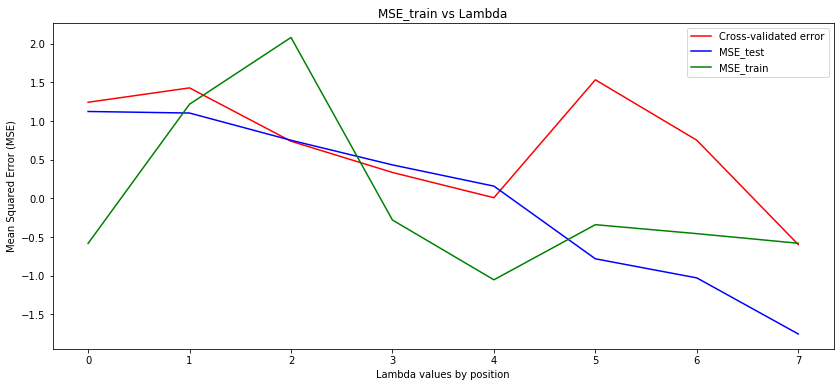

In [311]:
plt.figure(figsize=(14,6))
plt.plot(Max, label='Cross-validated error', color='r')
plt.plot(MSE_test, label='MSE_test', color='b')
plt.plot(MSE_train, label='MSE_train', color='g')
plt.xlabel('Lambda values by position')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE_train vs Lambda')
plt.legend()
plt.show()

# Discussion

NB: Lambda values are referenced by position on the plot.

As indicated in the table above the best value is λ = 200, therefore the plots also confirm that the MSE error estimates for train, test and cross_validated errors tend to drop where λ = 200. The plot also shows that the error estimates for other λ values is not stable/consistent compared to at λ = 200. The model also performs well on useen data(test), because the error decrease consistently compared to the train data.